# Linear Regression


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## 3. Nonlinear

$$f(x) = \sin(3.2x) + 0.8x$$


### 3. 生成假資料

In [2]:
x = np.linspace(0, 5, 100)
y = np.sin(3.2*x) + 0.8*x + 0.3*np.random.randn(100)

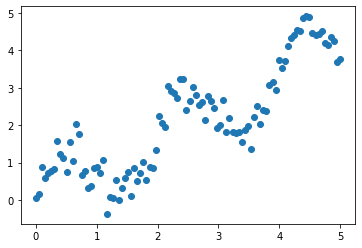

In [3]:
plt.scatter(x,y)

#### nonlinear

In [4]:
regr_lin = LinearRegression()

In [5]:
X = x.reshape(-1, 1)
print(X.shape)

(100, 1)


In [6]:
regr_lin.fit(X,y)

LinearRegression()

0.5511067079610057


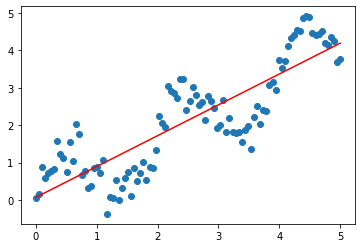

In [7]:
Y=regr_lin.predict(X)
plt.scatter(x,y)
plt.plot(x,Y , color='r')
mse = np.sum((Y-y)**2) / len(y)
print(mse)

果然超級不準, 該如何是好?

#### 多項式

多項式5次方

$$\widehat{y}=xw+b=w_{1}x_{1}+w_{2}x_{1}^{2}+w_{3}x_{1}^{3}+w_{4}x_{1}^{4}+w_{5}x_{1}^{5}+b$$

In [8]:
print(x.shape)

(100,)


In [9]:
X_poly = np.array([[k, k**2, k**3, k**4, k**5] for k in x])  # add k**6 to try it
print(X_poly.shape)

(100, 5)


In [10]:
regr_poly = LinearRegression()

In [11]:
regr_poly.fit(X_poly, y)

LinearRegression()

MSE: 0.4743460712862441


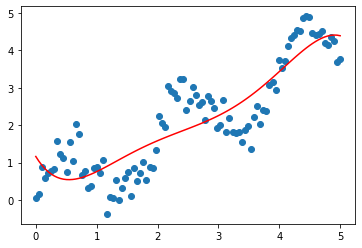

In [12]:
plt.scatter(x,y)
plt.plot(x, regr_poly.predict(X_poly), 'r')

Y_poly = regr_poly.predict(X_poly)
mse_poly = np.sum((Y_poly-y)**2) / len(y)
print("MSE:", mse_poly)

In [13]:
print('Coefficients: ', regr_poly.coef_)
print('interception: ', regr_poly.intercept_)

Coefficients:  [-2.67963473  3.67550641 -1.74314723  0.37117548 -0.0285924 ]
interception:  1.1623213803568557


In [14]:
W=regr_poly.coef_
b=regr_poly.intercept_
np.dot(X_poly,W.T)+b

array([1.16232138, 1.03613947, 0.92739438, 0.83482426, 0.75722297,
       0.69343895, 0.64237407, 0.60298255, 0.5742698 , 0.55529127,
       0.54515139, 0.54300238, 0.54804314, 0.55951816, 0.57671632,
       0.59896982, 0.62565305, 0.65618144, 0.69001031, 0.72663383,
       0.76558378, 0.80642852, 0.84877179, 0.89225164, 0.93653925,
       0.98133785, 1.02638157, 1.07143429, 1.11628855, 1.16076442,
       1.20470835, 1.24799205, 1.29051137, 1.33218517, 1.37295419,
       1.41277993, 1.4516435 , 1.48954452, 1.52649997, 1.56254311,
       1.59772226, 1.63209978, 1.66575085, 1.69876242, 1.73123203,
       1.76326668, 1.79498175, 1.82649984, 1.85794964, 1.88946479,
       1.92118281, 1.95324391, 1.9857899 , 2.01896302, 2.05290487,
       2.08775525, 2.12365104, 2.16072505, 2.19910492, 2.238912  ,
       2.2802602 , 2.32325484, 2.3679916 , 2.4145553 , 2.46301885,
       2.51344208, 2.56587061, 2.62033475, 2.67684834, 2.73540765,
       2.79599026, 2.85855387, 2.92303527, 2.98934911, 3.05738

In [15]:
regr_poly.predict(X_poly)

array([1.16232138, 1.03613947, 0.92739438, 0.83482426, 0.75722297,
       0.69343895, 0.64237407, 0.60298255, 0.5742698 , 0.55529127,
       0.54515139, 0.54300238, 0.54804314, 0.55951816, 0.57671632,
       0.59896982, 0.62565305, 0.65618144, 0.69001031, 0.72663383,
       0.76558378, 0.80642852, 0.84877179, 0.89225164, 0.93653925,
       0.98133785, 1.02638157, 1.07143429, 1.11628855, 1.16076442,
       1.20470835, 1.24799205, 1.29051137, 1.33218517, 1.37295419,
       1.41277993, 1.4516435 , 1.48954452, 1.52649997, 1.56254311,
       1.59772226, 1.63209978, 1.66575085, 1.69876242, 1.73123203,
       1.76326668, 1.79498175, 1.82649984, 1.85794964, 1.88946479,
       1.92118281, 1.95324391, 1.9857899 , 2.01896302, 2.05290487,
       2.08775525, 2.12365104, 2.16072505, 2.19910492, 2.238912  ,
       2.2802602 , 2.32325484, 2.3679916 , 2.4145553 , 2.46301885,
       2.51344208, 2.56587061, 2.62033475, 2.67684834, 2.73540765,
       2.79599026, 2.85855387, 2.92303527, 2.98934911, 3.05738

#### RBF

$$\phi_i = e^{-\| x - c_i \|^2/2\sigma^2}$$

In [16]:
# normal distrubution
def RBF(x, center, sigma):
    k = np.exp(-(x - center)**2/(2*sigma**2))
    return k

In [17]:
sigma = 0.3

In [18]:
X_rbf = np.array([[RBF(k, .5, sigma), 
                  RBF(k, 1.5, sigma),
                  RBF(k, 2.5, sigma),
                  RBF(k, 3.5, sigma),
                  RBF(k, 4.5, sigma)] for k in x])



In [19]:
regr_rbf = LinearRegression()

In [20]:
regr_rbf.fit(X_rbf, y)

LinearRegression()

MSE: 0.26928532916890385


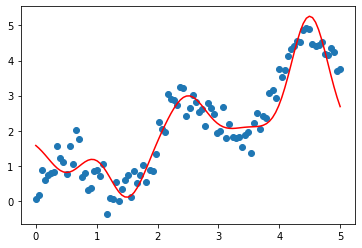

In [21]:
plt.scatter(x,y)
plt.plot(x, regr_rbf.predict(X_rbf), 'r')

Y_rbf = regr_rbf.predict(X_rbf)
mse_rbf = np.sum((Y_rbf-y)**2) / len(y)
print("MSE:", mse_rbf)

In [22]:
print('Coefficients: ', regr_rbf.coef_)
print('interception: ', regr_rbf.intercept_)

Coefficients:  [-1.01563255 -1.72916529  1.16909253  0.25757599  3.43089664]
interception:  1.8305255427104559


#### Comparison

In [23]:
Y_lin = regr_lin.predict(X)
Y_poly = regr_poly.predict(X_poly)
Y_rbf = regr_rbf.predict(X_rbf)

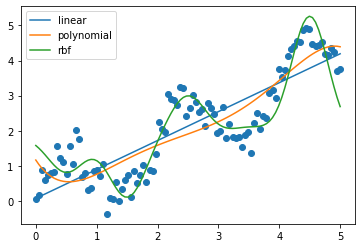

In [24]:
plt.scatter(x,y)

plt.plot(x, Y_lin, label='linear')
plt.plot(x, Y_poly, label='polynomial')
plt.plot(x, Y_rbf, label='rbf')
plt.legend()

## 請計算模型的MSE

In [25]:
print(np.sum((regr_lin.predict(X)-y)**2) / len(y))

0.5511067079610057


In [26]:
print(np.sum((regr_poly.predict(X_poly)-y)**2) / len(y))

0.4743460712862441


In [27]:
print(np.sum((regr_rbf.predict(X_rbf)-y)**2) / len(y))

0.26928532916890385
